# Code for Figure 6 and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
def load_emissions_values_2035(noev_scenario, solar=3.5, wind=3, folder='Fuel1_Solar35_Wind3', penlevel=0.5):
    
    scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
    scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

    vals1 = np.zeros((7, 5)) # overgeneration
    tables_dfs1 = pd.DataFrame(np.zeros((7, 5)), 
                              index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                              columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
            # assumes 5 miles / kWh
            vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
            tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20220408.csv')
    
    # assumes 5 miles / kWh
    vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
    tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    return vals1, tables_dfs1


In [7]:
noev_scenario_3 = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
vals_3, tables_dfs_3 = load_emissions_values_2035(noev_scenario_3, solar=3.5, wind=3, folder='Fuel1_Solar35_Wind3', penlevel=0.5)
vals_3_100p, tables_dfs_3_100p = load_emissions_values_2035(noev_scenario_3, solar=3.5, wind=3, folder='Fuel1_Solar35_Wind3', penlevel=1.0)


In [6]:
tables_dfs_3

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,88.107592,85.998345,84.032685,84.183262,0.00000
_Timers12am_noWPcontrol,87.485406,85.704920,83.909572,84.022326,0.00000
_TimersRandom_noWPcontrol,87.445970,85.657204,83.896009,83.990588,0.00000
_TimersNone_noWPcontrol,87.640214,85.715748,83.928332,84.021174,0.00000
_TimersNone_WPcontrol_minpeak,87.907040,85.856119,84.329127,84.239030,0.00000
_TimersNone_WPcontrol_avgem,87.626168,85.734884,83.955993,84.021187,0.00000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,85.97317


In [8]:
tables_dfs_3_100p

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,93.303893,91.049505,89.454503,89.376758,0.000000
_Timers12am_noWPcontrol,92.913900,90.464238,89.376142,89.287521,0.000000
_TimersRandom_noWPcontrol,92.656211,90.330792,89.350777,89.258378,0.000000
_TimersNone_noWPcontrol,92.878171,90.596730,89.373455,89.272047,0.000000
_TimersNone_WPcontrol_minpeak,93.105287,90.808932,89.576745,89.438185,0.000000
_TimersNone_WPcontrol_avgem,92.849741,90.578607,89.531604,89.374848,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,90.876414


In [11]:
noev_scenario_4 = pd.read_csv('Results/NoEVs_year2035_solar5x_wind5x_dpdf_20220408.csv')
vals_4, tables_dfs_4 = load_emissions_values_2035(noev_scenario_4, solar=5, wind=5, folder='Fuel1_Solar5_Wind5_2035', penlevel=0.5)
vals_4_100p, tables_dfs_4_100p = load_emissions_values_2035(noev_scenario_4, solar=5, wind=5, folder='Fuel1_Solar5_Wind5_2035', penlevel=1.0)


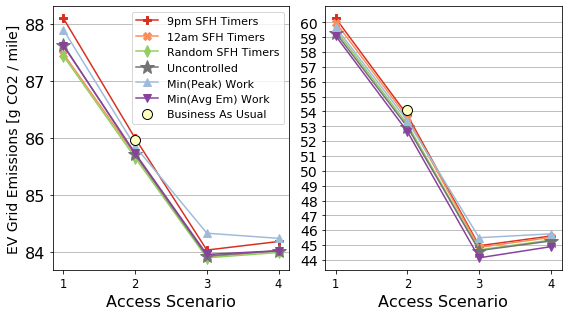

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=False, sharex=True)
titles = ['1', '2', '3', '4'] #['AllAtHomeL2Access', 'BaseCase', 'LessHome_MoreWork', 'LessHome_MorePublic']

colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
# control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'No Timers; No Work Control', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Min(Avg Em) Work']

titles2 = ['Total Emissions / Total Energy', 'Fraction of Total Energy Served by Renewables', 
          'Total Fuel Costs / Total Energy', 'Size of Battery Needed']
units = ['[kg CO2 / MWh]', 'Fraction', '[$ / MWh]', '[MW]']

for i in range(2):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=titles, fontsize=11.5)
    axes[i].set_xlabel('Access Scenario', fontsize=16)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']

for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_3[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[0].scatter([1], np.array(vals_3[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_4[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[1].scatter([1], np.array(vals_4[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

axes[0].set_yticks(np.arange(84, 89))
axes[0].set_yticklabels(np.arange(84, 89), fontsize=16)
axes[1].set_yticks(np.arange(44, 61))
axes[1].set_yticklabels(np.arange(44, 61), fontsize=14)
for i in range(2):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')

axes[0].legend(loc='upper right', fontsize=11)

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6a_v2_2035.pdf', bbox_inches='tight')
plt.show()

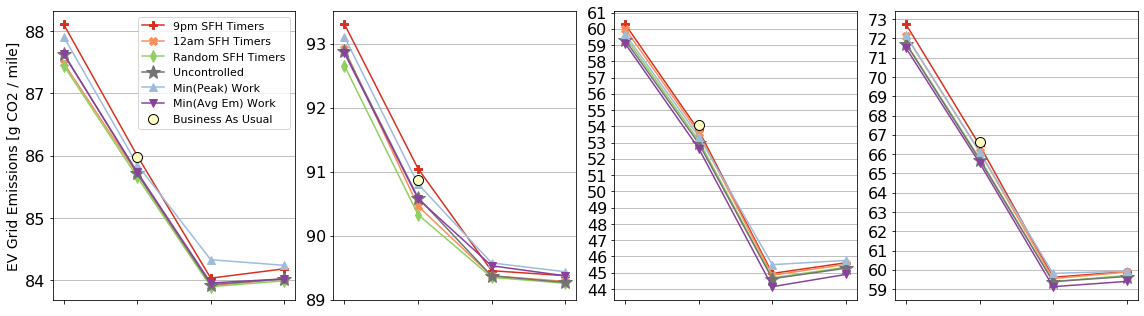

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5), sharey=False, sharex=True)
titles = ['1', '2', '3', '4'] #['AllAtHomeL2Access', 'BaseCase', 'LessHome_MoreWork', 'LessHome_MorePublic']

colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Min(Avg Em) Work']

titles2 = ['Total Emissions / Total Energy', 'Fraction of Total Energy Served by Renewables', 
          'Total Fuel Costs / Total Energy', 'Size of Battery Needed']
units = ['[kg CO2 / MWh]', 'Fraction', '[$ / MWh]', '[MW]']

for i in range(2):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=[], fontsize=11.5)
#     axes[i].set_xlabel('Access Scenario', fontsize=16)

ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']

# 50%
for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_3[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[0].scatter([1], np.array(vals_3[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

# 100%
for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_3_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[1].scatter([1], np.array(vals_3_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

#50%
for control_idx in range(6):
    axes[2].plot(np.arange(0, 4), vals_4[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[2].scatter([1], np.array(vals_4[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

#100%
for control_idx in range(6):
    axes[3].plot(np.arange(0, 4), vals_4_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[3].scatter([1], np.array(vals_4_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

# axes[0].set_xlim([-0.5, 3.5])

axes[0].set_yticks(np.arange(84, 89))
axes[0].set_yticklabels(np.arange(84, 89), fontsize=16)
axes[1].set_yticks(np.arange(89, 94))
axes[1].set_yticklabels(np.arange(89, 94), fontsize=16)
axes[2].set_yticks(np.arange(44, 62))
axes[2].set_yticklabels(np.arange(44, 62), fontsize=16)
axes[3].set_yticks(np.arange(59, 74))
axes[3].set_yticklabels(np.arange(59, 74), fontsize=16)
for i in range(4):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')

axes[0].legend(loc='upper right', fontsize=11)

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6a_v2_2035_50and100.pdf', bbox_inches='tight')
plt.show()

In [34]:
print('Worst is higher than best by X percent, with 50% EVs: ',(vals_3[vals_3>0].max() - vals_3[vals_3>0].min()) / vals_3[vals_3>0].min())
print('Worst is higher than best by X percent, with 100% EVs: ',(vals_3_100p[vals_3_100p>0].max() - vals_3_100p[vals_3_100p>0].min()) / vals_3_100p[vals_3_100p>0].min())

Worst is higher than best by X percent, with 50% EVs:  0.05020004497425899
Worst is higher than best by X percent, with 100% EVs:  0.04532365132244023


In [35]:
print('Worst is higher than best by X percent, with 50% EVs and high renewables: ',(vals_4[vals_4>0].max() - vals_4[vals_4>0].min()) / vals_4[vals_4>0].min())
print('Worst is higher than best by X percent, with 100% EVs and high renewables: ',(vals_4_100p[vals_4_100p>0].max() - vals_4_100p[vals_4_100p>0].min()) / vals_4_100p[vals_4_100p>0].min())

Worst is higher than best by X percent, with 50% EVs and high renewables:  0.3655897920706484
Worst is higher than best by X percent, with 100% EVs and high renewables:  0.22996530068011037


In [54]:
maxval = 0
vals_4[3, :] # uncontrolled
for i in [0, 1, 2, 4, 5]:
    print(np.round(np.max((vals_4[i, np.arange(0, 4)] - vals_4[3,  np.arange(0, 4)]) / vals_4[3,  np.arange(0, 4)]), 4))
    if np.round(np.max((vals_4[i, np.arange(0, 4)] - vals_4[3,  np.arange(0, 4)]) / vals_4[3,  np.arange(0, 4)]), 4) > maxval:
        maxval = np.round(np.max((vals_4[i, np.arange(0, 4)] - vals_4[3,  np.arange(0, 4)]) / vals_4[3,  np.arange(0, 4)]), 4)

0.0165
0.0118
0.0033
0.0194
-0.0036


In [55]:
vals_4_100p[3, :] # uncontrolled
for i in [0, 1, 2, 4, 5]:
    print(np.round(np.max((vals_4_100p[i, np.arange(0, 4)] - vals_4_100p[3,  np.arange(0, 4)]) / vals_4_100p[3,  np.arange(0, 4)]), 4))
    if np.round(np.max((vals_4_100p[i, np.arange(0, 4)] - vals_4_100p[3,  np.arange(0, 4)]) / vals_4_100p[3,  np.arange(0, 4)]), 4) > maxval:
        maxval = np.round(np.max((vals_4_100p[i, np.arange(0, 4)] - vals_4_100p[3,  np.arange(0, 4)]) / vals_4_100p[3,  np.arange(0, 4)]), 4)

0.014
0.0064
0.0011
0.0072
-0.0025


In [56]:
vals_3[3, :] # uncontrolled
for i in [0, 1, 2, 4, 5]:
    print(np.round(np.max((vals_3[i, np.arange(0, 4)] - vals_3[3,  np.arange(0, 4)]) / vals_3[3,  np.arange(0, 4)]), 4))
    if np.round(np.max((vals_3[i, np.arange(0, 4)] - vals_3[3,  np.arange(0, 4)]) / vals_3[3,  np.arange(0, 4)]), 4) > maxval:
        maxval = np.round(np.max((vals_3[i, np.arange(0, 4)] - vals_3[3,  np.arange(0, 4)]) / vals_3[3,  np.arange(0, 4)]), 4)
    
vals_3_100p[3, :] # uncontrolled
for i in [0, 1, 2, 4, 5]:
    print(np.round(np.max((vals_3_100p[i, np.arange(0, 4)] - vals_3_100p[3,  np.arange(0, 4)]) / vals_3_100p[3,  np.arange(0, 4)]), 4))
    if np.round(np.max((vals_3_100p[i, np.arange(0, 4)] - vals_3_100p[3,  np.arange(0, 4)]) / vals_3_100p[3,  np.arange(0, 4)]), 4) > maxval:
        maxval = np.round(np.max((vals_3_100p[i, np.arange(0, 4)] - vals_3_100p[3,  np.arange(0, 4)]) / vals_3_100p[3,  np.arange(0, 4)]), 4)

0.0053
0.0
-0.0004
0.0048
0.0003
0.005
0.0004
-0.0002
0.0024
0.0018


In [57]:
print('Max impact of control: ', maxval)

Max impact of control:  0.0194


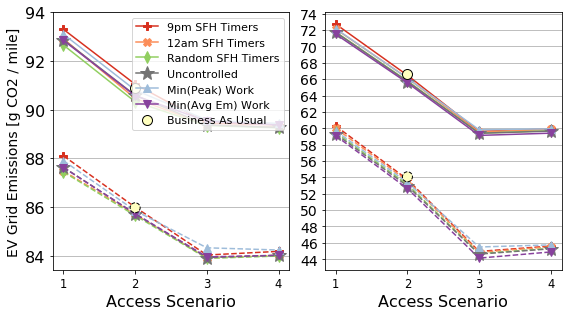

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=False, sharex=True)
titles = ['1', '2', '3', '4'] #['AllAtHomeL2Access', 'BaseCase', 'LessHome_MoreWork', 'LessHome_MorePublic']

colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
# control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'No Timers; No Work Control', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Min(Avg Em) Work']

titles2 = ['Total Emissions / Total Energy', 'Fraction of Total Energy Served by Renewables', 
          'Total Fuel Costs / Total Energy', 'Size of Battery Needed']
units = ['[kg CO2 / MWh]', 'Fraction', '[$ / MWh]', '[MW]']

for i in range(2):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=titles, fontsize=11.5)
    axes[i].set_xlabel('Access Scenario', fontsize=16)

# shifts = [-0.2, -0.1, 0, 0.1, 0.2]
ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']

# for control_idx in range(5):
#     axes[0].plot(np.arange(0, 4), vals_1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
# axes[0].scatter([1], np.array(vals_1[5, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_3_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[0].scatter([1], np.array(vals_3_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)
for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_3[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, linestyle='--')
axes[0].scatter([1], np.array(vals_3[6, 4]), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')

for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_4[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, linestyle='--')
axes[1].scatter([1], np.array(vals_4[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, linestyle='--')
for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_4_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[1].scatter([1], np.array(vals_4_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

# axes[0].set_xlim([-0.5, 3.5])

axes[0].set_yticks(np.arange(84, 95, 2))
axes[0].set_yticklabels(np.arange(84, 95, 2), fontsize=16)
# axes[0].set_yticks([103, 104, 105])
# axes[0].set_yticklabels([103, 104, 105], fontsize=16)
axes[1].set_yticks(np.arange(44, 76, 2))
axes[1].set_yticklabels(np.arange(44, 76, 2), fontsize=14)
for i in range(2):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')

axes[0].legend(loc='upper right', fontsize=11)

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6a_v2_2035_100p.pdf', bbox_inches='tight')
plt.show()

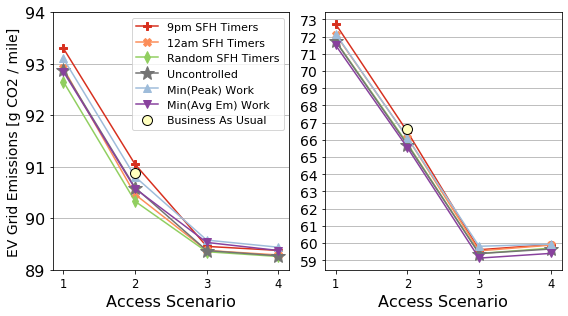

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=False, sharex=True)
titles = ['1', '2', '3', '4'] #['AllAtHomeL2Access', 'BaseCase', 'LessHome_MoreWork', 'LessHome_MorePublic']

colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
# control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'No Timers; No Work Control', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work', 'Min(Avg Em) Work']

titles2 = ['Total Emissions / Total Energy', 'Fraction of Total Energy Served by Renewables', 
          'Total Fuel Costs / Total Energy', 'Size of Battery Needed']
units = ['[kg CO2 / MWh]', 'Fraction', '[$ / MWh]', '[MW]']

for i in range(2):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=titles, fontsize=11.5)
    axes[i].set_xlabel('Access Scenario', fontsize=16)

# shifts = [-0.2, -0.1, 0, 0.1, 0.2]
ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']

# for control_idx in range(5):
#     axes[0].plot(np.arange(0, 4), vals_1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
# axes[0].scatter([1], np.array(vals_1[5, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_3_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[0].scatter([1], np.array(vals_3_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_4_100p[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[1].scatter([1], np.array(vals_4_100p[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

# axes[0].set_xlim([-0.5, 3.5])

axes[0].set_yticks(np.arange(89, 95))
axes[0].set_yticklabels(np.arange(89, 95), fontsize=16)
# axes[0].set_yticks([103, 104, 105])
# axes[0].set_yticklabels([103, 104, 105], fontsize=16)
axes[1].set_yticks(np.arange(59, 74))
axes[1].set_yticklabels(np.arange(59, 74), fontsize=14)
for i in range(2):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')

axes[0].legend(loc='upper right', fontsize=11)

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6a_v2_2035_100p_only.pdf', bbox_inches='tight')
plt.show()

In [30]:
print((vals_4_100p.max() - vals_4_100p[vals_4_100p>0].min())/vals_4_100p.max())
print((vals_4_100p.max() - vals_4_100p[vals_4_100p>0].min())/vals_4_100p[vals_4_100p>0].min())

0.1869689336381692
0.22996530068011037


In [31]:
print((vals_3_100p.max() - vals_3_100p[vals_3_100p>0].min())/vals_3_100p.max())
print((vals_3_100p.max() - vals_3_100p[vals_3_100p>0].min())/vals_3_100p[vals_3_100p>0].min())

0.04335848640284874
0.04532365132244023


In [45]:
for scen in tables_dfs_3_100p.columns:
    print(scen, 100*(tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].max() - tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].min())/tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].max())
    print(scen, 100*(tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].max() - tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].min())/tables_dfs_3_100p[tables_dfs_3_100p[scen]>0][scen].min())



UniversalHome 0.6941639700280966
UniversalHome 0.6990162892527163
HighHome 0.789364221919057
HighHome 0.7956447569641065
LowHome_HighWork 0.252261819083587
LowHome_HighWork 0.25289978869099744
LowHome_LowWork 0.20104131079949233
LowHome_LowWork 0.2014463010837482
BusinessAsUsual 0.0
BusinessAsUsual 0.0


In [23]:
tmp = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_LowHome_HighWork_TimersNone_noWPcontrol_penlevel0.5_overgeneration.csv')
len(pd.to_datetime(tmp['datetime']).dt.date.unique())

52

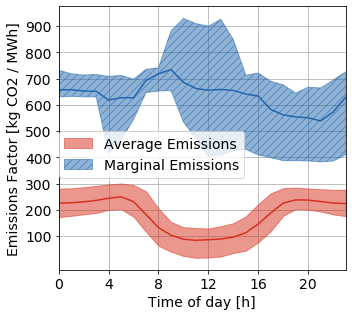

In [37]:
plt.figure(figsize=(5, 4.5))
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
inds = noev_scenario_3[pd.to_datetime(noev_scenario_3['datetime']).dt.weekday.isin([0,1,2,3,4])].index
plt.plot((noev_scenario_3.loc[inds, 'co2_tot'] / noev_scenario_3.loc[inds, 'total_incl_noncombustion']).values.reshape(-1, 24).mean(axis=0), color=colors[0])
plt.fill_between(np.arange(0, 24), np.percentile((noev_scenario_3.loc[inds, 'co2_tot'] / noev_scenario_3.loc[inds, 'total_incl_noncombustion']).values.reshape(-1, 24), 25, axis=0), np.percentile((noev_scenario_3.loc[inds, 'co2_tot'] / noev_scenario_3.loc[inds, 'total_incl_noncombustion']).values.reshape(-1, 24), 75, axis=0), alpha=0.5, color=colors[0], label='Average Emissions')
plt.plot((noev_scenario_3.loc[inds, 'co2_marg']).values.reshape(-1, 24).mean(axis=0), color='#2166ac')
plt.fill_between(np.arange(0, 24), np.percentile((noev_scenario_3.loc[inds, 'co2_marg']).values.reshape(-1, 24), 25, axis=0), np.percentile((noev_scenario_3.loc[inds, 'co2_marg']).values.reshape(-1, 24), 75, axis=0), alpha=0.5, color='#2166ac', hatch='///', label='Marginal Emissions')
plt.legend(loc=(0, 0.35), fontsize=14)
plt.ylabel('Emissions Factor [kg CO2 / MWh]', fontsize=14)
plt.yticks(np.arange(100, 901, 100), fontsize=14)
plt.xticks([0,4,8,12,16,20], fontsize=14)
plt.gca().set_axisbelow(True)        
plt.grid()
plt.xlim([0, 23])
plt.xlabel('Time of day [h]', fontsize=14)
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6b_v2_2035.pdf', bbox_inches='tight')
plt.show()



In [38]:
print('Worst scenario is higher than best scenario by _% in each case: ')
print(np.round(100*(((vals_5[vals_5>0]).max() / (vals_5[vals_5>0]).min()) - 1), 2))
print(np.round(100*(((vals_3[vals_3>0]).max() / (vals_3[vals_3>0]).min()) - 1), 2))
print(np.round(100*(((vals_4[vals_4>0]).max() / (vals_4[vals_4>0]).min()) - 1), 2))

Worst scenario is higher than best scenario by _% in each case: 
1.84
5.02
36.56


In [43]:
def maxchange_control(vals_1):
    maxchange = 0
    for i in range(6):
        if i != 3:
            for j in range(4):
                chg = np.abs((vals_1[i, j] - vals_1[3, j]) / vals_1[3, j])
                if chg > maxchange:
                    maxchange = chg

    chg = np.abs((vals_1[6, 4] - vals_1[3, 1]) / vals_1[3, 1])
    if chg > maxchange:
        maxchange = chg
    
    return maxchange

print('Grid 2.5: ', maxchange_control(vals_5))
print('Grid 3/3.5: ', maxchange_control(vals_3))
print('Grid 5: ', maxchange_control(vals_4))

Grid 2.5:  0.003599843334394349
Grid 3/3.5:  0.005332914225650101
Grid 5:  0.021166076984210316


In [47]:
print('Range in base case grid: ', np.round(vals_3[vals_3>0].min(), 3), np.round(vals_3[vals_3>0].max(), 3))

Range in base case grid:  83.896 88.108


In [1]:
404/88

4.590909090909091